<h2><font color = "black"> Convolution Neural Network in MNIST Data </font></h2>

#### Importing packages

In [1]:
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Input, InputLayer, Dense, Dropout, ZeroPadding2D, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
from keras.optimizers import Adam, SGD
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import seaborn as sns

Using TensorFlow backend.


#### Function for plotting dynamic graph

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#### Loading mnist data

In [3]:
#https://keras.io/examples/mnist_cnn/

img_rows, img_cols = 28, 28

(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_data_format()=='channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
    
else:
    X_train = X_train.reshape(X_train.shape[0],  img_rows, img_cols,1)
    X_test = X_test.reshape(X_test.shape[0],  img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

11493376/11490434 [==============================] - 109s 9us/step


In [4]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


<IPython.core.display.Javascript object>


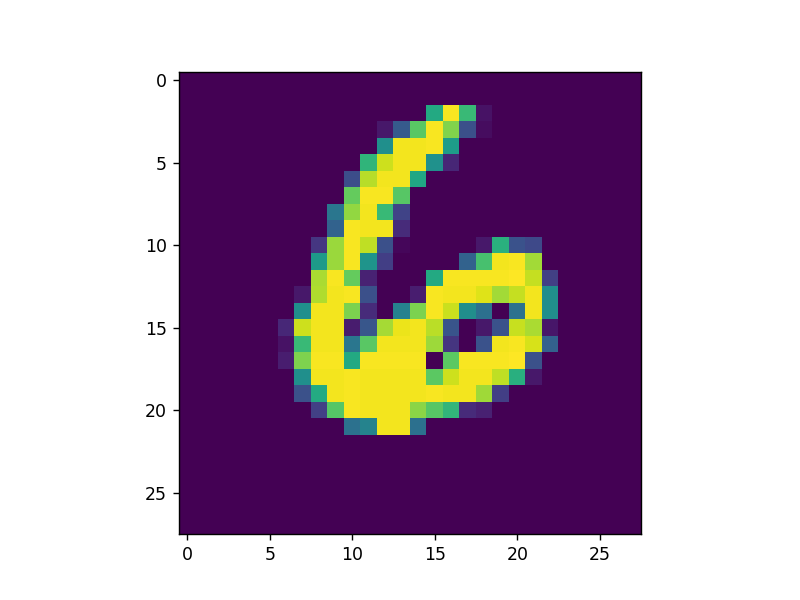

In [5]:
plt.imshow(X_train[299].reshape(28,28))

#### Normalizing pixel values

In [6]:
# Data Normalization
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

#### After normalization (pixel value ranges from 0-1)

In [7]:
#Softmax output dim
num_classes = 10
batch_size = 140
epochs = 20

# Model 1 

In [8]:
# Converting y_train 10-D vector
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# Model

model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu', input_shape = input_shape))

model.add(Conv2D(filters=32, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(BatchNormalization())

model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu'))

model.add(Conv2D(filters=128, kernel_size=(3,3), strides =(1,1), padding = 'same',
                 activation = 'relu'))

model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(units = 512, activation='relu'))


model.add(Dense(units = num_classes, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model.summary(), '\n')

history = model.fit(X_train, y_train, batch_size = batch_size,
                    epochs = epochs, verbose = 1, validation_data = (X_test, y_test))














Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        18496     
_____________

60000/60000 [==============================] - 12s 197us/step - loss: 0.0092 - acc: 0.9971 - val_loss: 0.0225 - val_acc: 0.9934
Epoch 18/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0088 - acc: 0.9973 - val_loss: 0.0319 - val_acc: 0.9922
Epoch 19/20
60000/60000 [==============================] - 12s 198us/step - loss: 0.0101 - acc: 0.9971 - val_loss: 0.0206 - val_acc: 0.9946
Epoch 20/20
60000/60000 [==============================] - 12s 199us/step - loss: 0.0071 - acc: 0.9976 - val_loss: 0.0323 - val_acc: 0.9918


#### train and test loss vs Epochs

Test score: 0.03228126819906069
Test accuracy: 0.9918


<IPython.core.display.Javascript object>


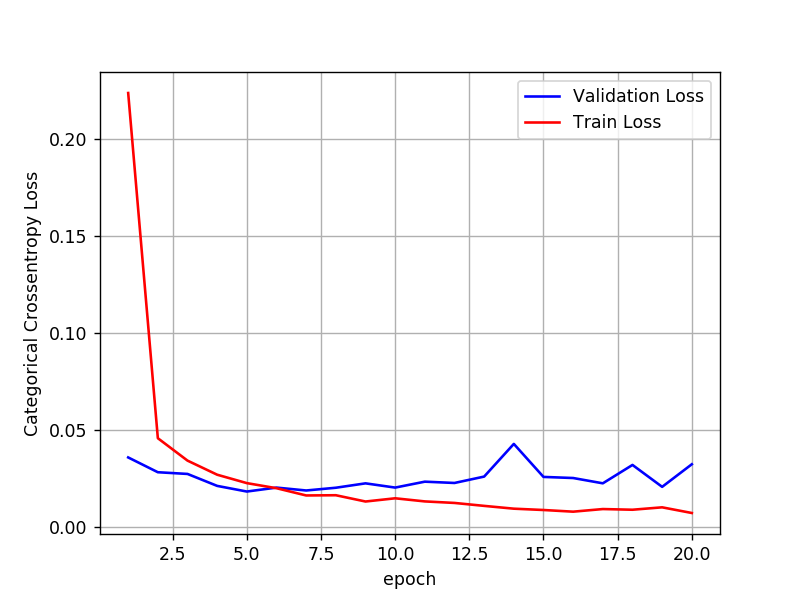

In [9]:
score = model.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

1. Validation loss kept on fluctuating in the range(0.1 to 0.3), train loss was decreasing slowly.

#### Violin plots of weights

<IPython.core.display.Javascript object>


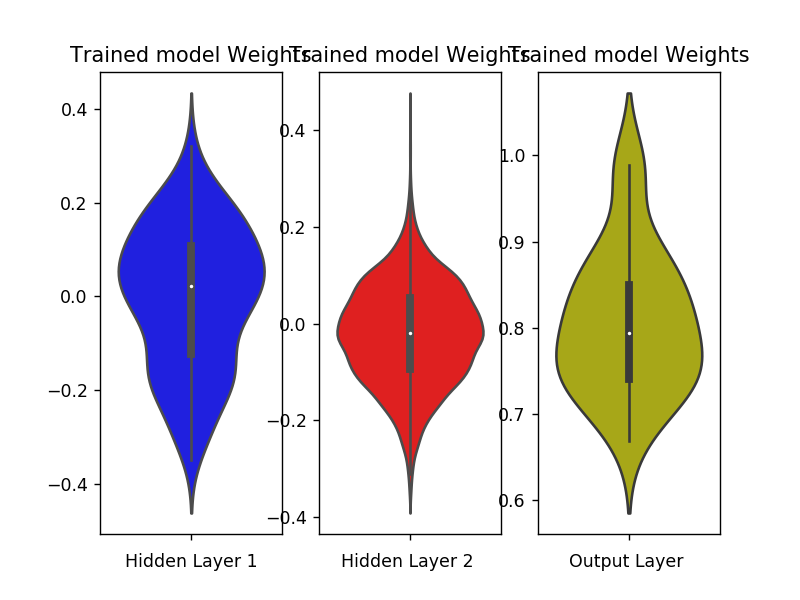

In [10]:
w_after = model.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

1. Weights at hidden layer ranges (-0.45 to 0.3).
2. Weights at hidden layer 2 ranges (-0.4 to 0.3).
3. Weights at output layer ranges (0.6 to 1.75).

# Model 2

In [11]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='sigmoid',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='sigmoid'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='sigmoid'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])


print(model2.summary(), '\n')

model2.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

#### train and test loss vs Epochs

Test score: 0.07039268123237416
Test accuracy: 0.9791


<IPython.core.display.Javascript object>


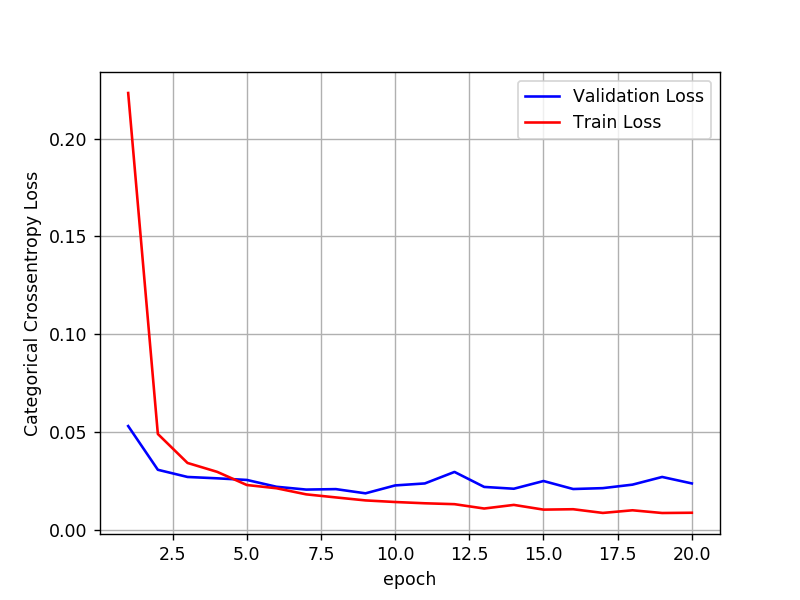

In [12]:
score = model2.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

1. validation loss was fluctuating in range (0.02 to 0.03) while train loss was decreasing slowly.

#### Visualizing weights with violin plot

<IPython.core.display.Javascript object>


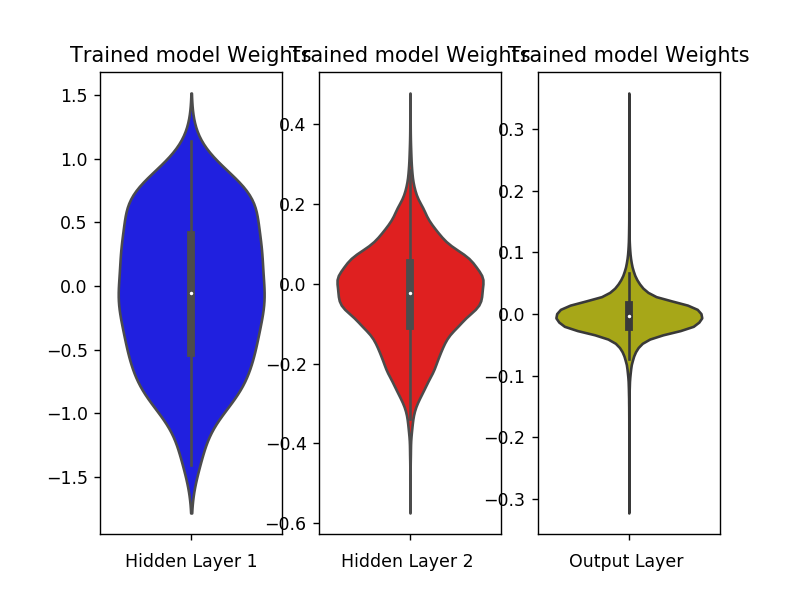

In [13]:
w_after = model2.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

1. Weights at hidden layer 1 ranges (-1.75 to 1.5).
2. Weights at hidden layer 2 ranges (-0.4 to 0.4).
3. Weights at output layer ranges (-0.1 to 0.1).

<h2><font color="red"> Model 3 -- Failed Model</font></h2>

In [14]:
model3 = Sequential()
model3.add(Conv2D(32, kernel_size=(3, 3),
                 activation='sigmoid',
                 input_shape=input_shape))
model3.add(Conv2D(64, (3, 3), activation='sigmoid'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(128, activation='sigmoid'))
model3.add(Dropout(0.5))
model3.add(Dense(num_classes, activation='softmax'))

model3.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

print(model3.summary(), '\n')

model3.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_6 (Dropout)          (None, 128)               0         
__________

SGD Optimizer seems to have stuck at local minima

<IPython.core.display.Javascript object>


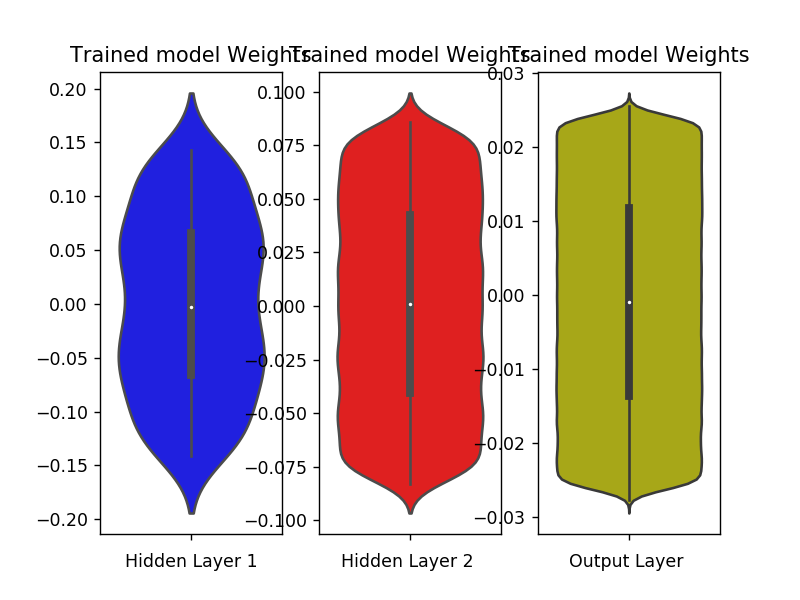

In [15]:
w_after = model3.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

1. Weights at hidden layer 1 ranges (-0.2 to 0.2).
2. Weights at hidden layer 2 ranges (-0.1 to 0.1).
3. Weights at output layer ranges (-0.03 to 0.03).

This model was not able to converge, SGD optimizer seems to have stuck at local minima

## Model 4 -- Best Model

In [17]:
model4 = Sequential()

model4.add(Conv2D(filters=16, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', input_shape = input_shape,
                 kernel_initializer = he_normal(seed=None)))

model4.add(Conv2D(filters=32, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model4.add(MaxPooling2D(pool_size=(2,2), strides=2))

model4.add(BatchNormalization())

model4.add(Dropout(0.25))

model4.add(Conv2D(filters=64, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model4.add(Conv2D(filters=64, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model4.add(MaxPooling2D(pool_size=(2,2), strides=2))

model4.add(Dropout(0.25))

model4.add(Conv2D(filters=128, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model4.add(MaxPooling2D(pool_size=(2,2), strides=2))

model4.add(Dropout(0.25))

model4.add(Conv2D(filters=256, kernel_size=(5,5), strides =(1,1), padding = 'same',
                 activation = 'relu', kernel_initializer = he_normal(seed=None)))

model4.add(MaxPooling2D(pool_size=(2,2), strides=2))


model4.add(Flatten())

model4.add(Dense(units = 512, activation='relu', kernel_initializer= he_normal(seed=None)))

model4.add(BatchNormalization())

model4.add(Dropout(0.25))

model4.add(Dense(units = 64, activation='relu', kernel_initializer= he_normal(seed=None)))

model4.add(BatchNormalization())

model4.add(Dropout(0.25))

model4.add(Dense(units = num_classes, activation='softmax'))

model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

print(model4.summary(), '\n')

history = model4.fit(X_train, y_train, batch_size = batch_size,
                    epochs = epochs, verbose = 1, validation_data = (X_test, y_test))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 28, 28, 32)        12832     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 14, 14, 32)        128       
_________________________________________________________________
dropout_7 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 14, 14, 64)        51264     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 14, 14, 64)        102464    
__________

#### Train and test loss vs epochs

Test score: 0.01894465626622841
Test accuracy: 0.9947


<IPython.core.display.Javascript object>


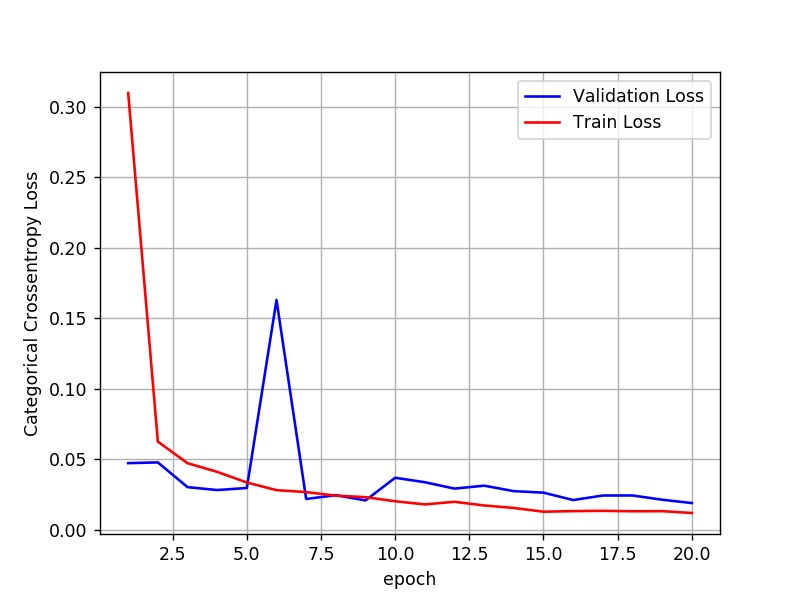

In [18]:
score = model4.evaluate(X_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,epochs+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs


vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

1. Both train and test loss are decreasing with number of epochs.

#### Visualizing weights with violin plot

<IPython.core.display.Javascript object>


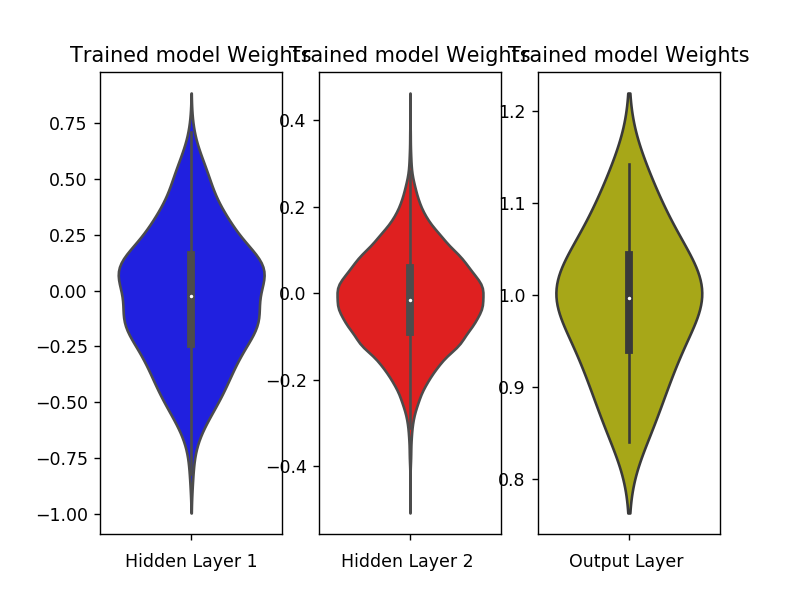

In [19]:
w_after = model4.get_weights()

h1_w = w_after[0].flatten().reshape(-1,1)
h2_w = w_after[2].flatten().reshape(-1,1)
out_w = w_after[4].flatten().reshape(-1,1)


fig = plt.figure()
plt.title("Weight matrices after model trained")
plt.subplot(1, 3, 1)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h1_w,color='b')
plt.xlabel('Hidden Layer 1')

plt.subplot(1, 3, 2)
plt.title("Trained model Weights")
ax = sns.violinplot(y=h2_w, color='r')
plt.xlabel('Hidden Layer 2 ')

plt.subplot(1, 3, 3)
plt.title("Trained model Weights")
ax = sns.violinplot(y=out_w,color='y')
plt.xlabel('Output Layer ')
plt.show()

1. Weights at hidden layer 1 ranges (-1.25 to 1).
2. Weights at hidden layer 2 ranges (-0.3 to 0.3).
3. Weights at output layer ranges (0.75 to i.25).

In [24]:
from prettytable import PrettyTable 
x = PrettyTable()
x.field_names = ["model", "No. convolution layers","Activation function","Optimizer","train loss", "test loss", "Train accuracy","Test accuracy"]
x.add_row(["Model 1", 4 , "ReLU" , "adam" ,0.008 , 0.026 , "99.7%" , "99.3%"])
x.add_row(["Model 2", 2 ,  "Sigmoid" , "adadelta" ,  0.11 , 0.07 , "97%" , "98%"])
x.add_row(["Model 3", 2 ,  "Sigmoid" , "SGD" ,  2.30 , 2.30 , "11%" , "11%"])
x.add_row(["Model 4", 6 ,  "ReLU" , "adam" , 0.01 , 0.01 , "99.6%" , "99.4%"])

print(x)

+---------+------------------------+---------------------+-----------+------------+-----------+----------------+---------------+
|  model  | No. convolution layers | Activation function | Optimizer | train loss | test loss | Train accuracy | Test accuracy |
+---------+------------------------+---------------------+-----------+------------+-----------+----------------+---------------+
| Model 1 |           4            |         ReLU        |    adam   |   0.008    |   0.026   |     99.7%      |     99.3%     |
| Model 2 |           2            |       Sigmoid       |  adadelta |    0.11    |    0.07   |      97%       |      98%      |
| Model 3 |           2            |       Sigmoid       |    SGD    |    2.3     |    2.3    |      11%       |      11%      |
| Model 4 |           6            |         ReLU        |    adam   |    0.01    |    0.01   |     99.6%      |     99.4%     |
+---------+------------------------+---------------------+-----------+------------+-----------+--

# Obeservations:
1. Model 1 was overfitting as train loss:0.008 and test loss:0.026.
2. Model 2 has performed better.
3. Model 3 that has SGD optimizer seems to have stuck at local minima, hence model 3 is the worst model.
4. He_normal weight initialization has slightly fasten the convergence of the model.
5. Model 4 is the best model, highest accuracy, fast convergence with no overfitting.
5. Adam optimizer has performed better than other optimizers.